
#Métodos computacionales: Tarea 07.
Por:  Mariana Toro Escobar y Juan Esteban Ospina Holguín.

In [1]:
#Librerias
import numpy as np
import sympy as sp
import scipy as sc
import pandas as pd
from scipy import optimize
from scipy import fft
from scipy.misc import derivative
from sympy import init_printing
import matplotlib.pylab as plt
from scipy.fft import fft, fftfreq
from scipy.interpolate import CubicSpline
init_printing() 

# Tarea Derivada

Los siguientes datos, son datos experimentales de un péndulo simple tomadas a través de una cámara web y procesados con el programa kinovea. Dados los datos en formato csv, se pide  construir un programa que realice lo siguiente: 

1. Leer el archivo csv a través de un Data Frame de Pandas, las columnas del data frame deberan ser:

col=["Tiempo[ms]", "AnguloDeg", "AnguloRad"]








In [2]:
route = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT8btHZ-A6ChzV5Rx_CQmCzbhO10J7R6LvQAyHx9qOCoCDAL9RJgaGUATf2z5lTMo-SjByvrnaX02Cz/pub?output=csv"
df = pd.read_csv(route,";")#Se leen los datos y se muestran 
df

,Tiempo (ms),"Ángulo 1,"
0,9,"59,289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,49247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [3]:
df = df.rename(columns = {"Tiempo (ms)":"Tiempo[ms]", 'Ángulo 1,':'AnguloDeg'})#Se cambia el nombre a las columnas 
df

,Tiempo[ms],AnguloDeg
0,9,"59,289611816406"
1,42,"59,9823265075684"
2,75,"61,2374534606934"
3,108,"63,49247741699"
4,142,"65,3887710571289"
...,...,...
2842,94709,"94,9375762939453"
2843,94743,"96,479850769043"
2844,94776,"97,9406890869141"
2845,94809,"99,3180923461914"


In [4]:
eval_= np.vectorize(eval )
d = eval_(df["AnguloDeg"].str.replace(",", "."))#Se remplaza la ',' por '.', esto para buscar cambiar el formato str a float

In [5]:
df["AnguloDeg"] = df["AnguloDeg"].str.replace(",", ".").astype("float64") #Para la columna 'AnguloDeg' se cambia el fomrmato str a float

In [6]:
df["AnguloRad"] = np.deg2rad(df["AnguloDeg"].values )# Se crea columna de angulo en radianes y se completa el Data Frame pedido
df

,Tiempo[ms],AnguloDeg,AnguloRad
0,9,59.289612,1.034799
1,42,59.982327,1.046889
2,75,61.237453,1.068795
3,108,63.492477,1.108153
4,142,65.388771,1.141249
...,...,...,...
2842,94709,94.937576,1.656973
2843,94743,96.479851,1.683891
2844,94776,97.940689,1.709387
2845,94809,99.318092,1.733428


2. Construya una grafica de :
plt.plot(df['Tiempo[ms]'], df['AnguloDeg'],"b-")

¿Qué puede concluir respecto al movimiento del pendulo?




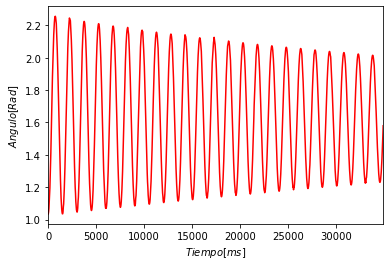

In [7]:
plt.figure()
plt.plot(df["Tiempo[ms]"], df["AnguloRad"], "r-")
plt.xlabel('$Tiempo[ms]$')
plt.ylabel('$Angulo[Rad]$')
plt.xlim(0, 34843  );

Notamos que a medida que pasa el tiempo el angulo se hace mas pequeño, por lo que se concluye que el pendulo es amortiguado.
así, cuando $t\rightarrow \infty$, entonces $Angulo\rightarrow 0$

3. Calculo la transformada de fourier de los datos obtenidos, para encontrar la frecuencia de oscilacion del sistema, para ello realice lo siguiente:

importe la librerias de scipy fft, fftfreq.
Aplique la transformada de fourier como sigue:

tf = fft(df['AnguloRad'].values)

T = 33E-3 #Paso del tiempo

N = len(df['Tiempo[ms]'])

xf = fftfreq(N, T)[:N//2]

plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-")

plt.ylabel("TF")

plt.xlabel("Frecuencia")

plt.xlim(0, 2)

Para las valores en el eje x y eje y de la anterior gráfica, realice una interpolación.

Encuentra el valor máximo empleando metodos de diferenciación.

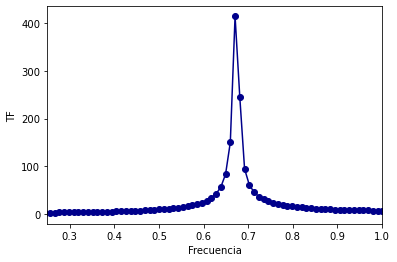

In [8]:
tf = fft(df['AnguloRad'].values)
T = 33E-3 #Paso del tiempo
N = len(df['Tiempo[ms]'])
xf = fftfreq(N, T)[:N//2]
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"o-",color = 'darkblue')
plt.ylabel("TF")
plt.xlabel("Frecuencia")
plt.xlim(0.25, 1);

In [9]:
cs = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))

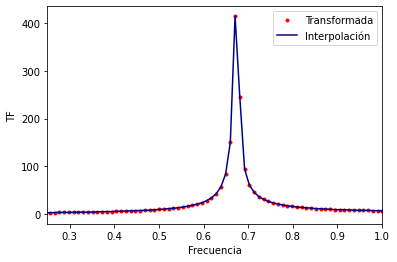

In [10]:
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"r.",label = 'Transformada')
plt.plot(abs(xf[1:N//2]), abs(cs(xf[1:N//2])),color = 'darkblue',label = 'Interpolación' ) 
plt.xlim(0.25, 1)
plt.xlabel('Frecuencia')
plt.ylabel('TF')
plt.legend();

In [11]:
cs = CubicSpline(xf[1:N//2], -np.abs(tf[1:N//2]))
min = optimize.fmin_powell(cs, 0.2)
min

Optimization terminated successfully.
         Current function value: -417.867925
         Iterations: 2
         Function evaluations: 44


array([0.67156])

Ahora nos propondremos encontrar el máximo para la interpolación cs usando derivadas.
Sabemos de la teoría que una función tiene máximo o mínimo cuando su derivada es cero. Así que calculamos la derivada para cs



In [12]:
from scipy import misc #Código tomado del texto guía, capitulo 5
def derivate(func,x0,**kwargs):
    '''
    Vectorized replacement of scipy.misc derivative:
        from scipy.misc import derivative
    For usage check the derivative help, e.g, in jupyter: 
        from scipy.misc import derivative
        derivative?
    '''
    try:
        #x0: can be an array or a list  
        nn=np.asarray(x0).shape[0] # force error if float is used 
        fp=np.vectorize(misc.derivative)
    except IndexError:
        fp=misc.derivative
        
    return fp(func,x0,**kwargs)

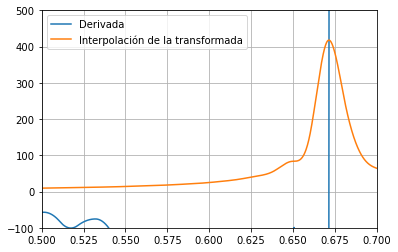

In [18]:
t = np.linspace(0.5,0.7,1000)#Espacio donde se evalúa la derivada
q = derivate(cs, t , dx = 1E-5)#puntos de la derivada
plt.plot(t,q, label = 'Derivada')#se grafican los puntos
plt.plot(t,-cs(t), label = 'Interpolación de la transformada')
plt.xlim(0.5,0.7)#Límites
plt.ylim(-100,500)
plt.grid()
plt.legend();

In [23]:
cs2 = CubicSpline(t, q)#Hacemos una interpolación para los puntos de la derivada
cs2.roots()#Se muestran las raíces de la derivada

array([4.94448930e-01, 6.71560005e-01, 9.32750945e+05])

In [31]:
cs2.construct_fast()

TypeError: construct_fast() missing 2 required positional arguments: 'c' and 'x'

Se muestran tres raíces donde la derivada se hace cero. Notamos que cerca de $0.4$ y cerca de $0.65$ la gráfica azul pasa por cero.
Pero nos interesa el segundo valor, pues es donde la transformada es máxima, así que encontramos el valore de frecuencia $f = 0.67156$


Así el máximo será:


In [15]:
-cs(cs2.roots()[1])